In [11]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats 
import math

# Checking goodness of fit of a Poisson Distribution

In [7]:
data={'Arrivales':[0,1,2,3,4,5,6,7,8,9,10,11,12],'Frequency':[0,1,4,10,14,20,12,12,9,8,6,3,1]}
data=pd.DataFrame(data)

In [8]:
data.head()

,Arrivales,Frequency
0,0,0
1,1,1
2,2,4
3,3,10
4,4,14


In [9]:
observedFrequency=data.Frequency
observedFrequency

0      0
1      1
2      4
3     10
4     14
5     20
6     12
7     12
8      9
9      8
10     6
11     3
12     1
Name: Frequency, dtype: int64

In [10]:
total_frquency=np.sum(observedFrequency)
mu=np.sum(data.Arrivales*data.Frequency)/total_frquency
mu

6.0

In [15]:
expectedFrequency=[]
for i in range(len(observedFrequency)):
    expectedFrequency.append(100*stats.poisson.pmf(i,mu))

    
expectedFrequency

[0.24787521766663584,
 1.4872513059998145,
 4.461753917999444,
 8.923507835998894,
 13.385261753998332,
 16.062314104797995,
 16.06231410479801,
 13.767697804112569,
 10.32577335308442,
 6.883848902056284,
 4.130309341233764,
 2.2528960043093247,
 1.1264480021546681]

In [16]:
expectedFrequencyRoundOff=[]
for i in expectedFrequency:
    expectedFrequencyRoundOff.append(round(i,2))
    
expectedFrequencyRoundOff

[0.25,
 1.49,
 4.46,
 8.92,
 13.39,
 16.06,
 16.06,
 13.77,
 10.33,
 6.88,
 4.13,
 2.25,
 1.13]

In [19]:
data['Expected Frquency']=expectedFrequencyRoundOff
data.head()

,Arrivales,Frequency,Expected Frquency
0,0,0,0.25
1,1,1,1.49
2,2,4,4.46
3,3,10,8.92
4,4,14,13.39


In [21]:
observedFrequency=list(observedFrequency)

In [22]:
observedFrequency

[0, 1, 4, 10, 14, 20, 12, 12, 9, 8, 6, 3, 1]

In [28]:
expectedFrequencyRoundOff

[0.25,
 1.49,
 4.46,
 8.92,
 13.39,
 16.06,
 16.06,
 13.77,
 10.33,
 6.88,
 4.13,
 2.25,
 1.13]

In [48]:
observedFrequency=[np.sum([0, 1, 4]),10,14,20,12,12,9,8,np.sum([6, 3, 1])]
expectedFrequencyRoundOff=[np.sum([0.25,1.49,4.46]),9.92,13.39,16.06,16.06,13.77,10.33,6.88,np.sum([4.13,2.25,1.13])]

In [49]:
observedFrequency

[5, 10, 14, 20, 12, 12, 9, 8, 10]

In [50]:
expectedFrequencyRoundOff

[6.2, 9.92, 13.39, 16.06, 16.06, 13.77, 10.33, 6.88, 7.51]

In [51]:
result=stats.chisquare(observedFrequency,expectedFrequencyRoundOff)
result

Power_divergenceResult(statistic=3.660329217958324, pvalue=0.8863966670934865)

In [54]:
stats.chi2.ppf(0.95,7)

14.067140449340169

In [55]:
# Since Chi observed is less than Chi Table do not reject null-hyothesis

# Checking the GOF of uniform Distribution

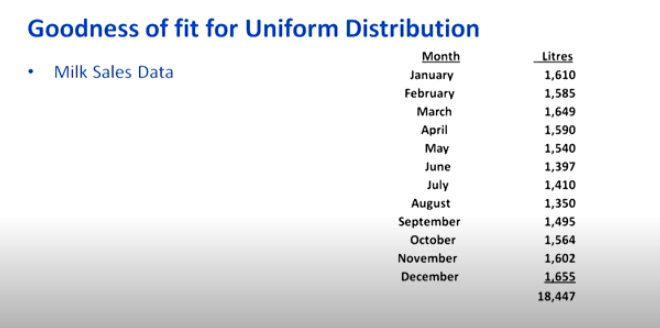

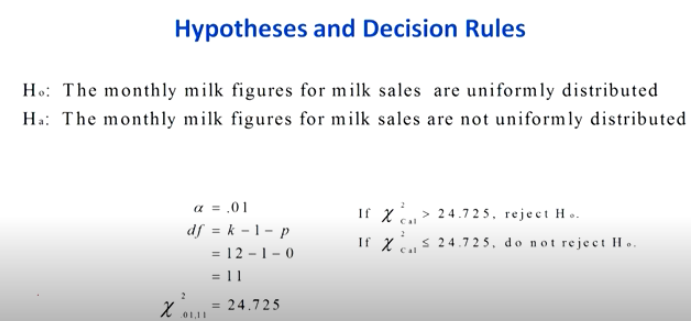

In [57]:
data=[1610,1585,1649,1590,1540,1397,1410,1350,1495,1564,1602,1655]
df=pd.DataFrame(data,columns=['MonthlyMilkSales'])
df

,MonthlyMilkSales
0,1610
1,1585
2,1649
3,1590
4,1540
5,1397
6,1410
7,1350
8,1495
9,1564


In [58]:
expectedFrequency=[]
for i in range(len(df.MonthlyMilkSales)):
    expectedFrequency.append(np.sum(df.MonthlyMilkSales)/12)
    
expectedFrequency

[1537.25,
 1537.25,
 1537.25,
 1537.25,
 1537.25,
 1537.25,
 1537.25,
 1537.25,
 1537.25,
 1537.25,
 1537.25,
 1537.25]

In [59]:
df['expectedFrequency']=expectedFrequency
df.head()

,MonthlyMilkSales,expectedFrequency
0,1610,1537.25
1,1585,1537.25
2,1649,1537.25
3,1590,1537.25
4,1540,1537.25


In [60]:
chiCalculated=[]
for i in range(len(df.MonthlyMilkSales)):
    chiCalculated.append((df.MonthlyMilkSales[i]-df.expectedFrequency[i])**2/df.expectedFrequency[i])

chiCalculated

[3.442876890551309,
 1.483208651813303,
 8.123637989917059,
 1.8100910717189787,
 0.004919499105545617,
 12.79561717352415,
 10.53346072532119,
 22.808627419092534,
 1.1612050739957718,
 0.46548219222637827,
 2.7273133842901283,
 9.019393397300375]

In [61]:
df['Chi-Square']=chiCalculated

In [63]:
chi2Calculated=np.sum(df['Chi-Square'])

In [64]:
chi2Tabular=stats.chi2.ppf(0.99,11)

In [65]:
chi2Calculated

74.37583346885673

In [66]:
chi2Tabular

24.724970311318277

In [67]:
# Since chi2Calculated is Greater than chi2Tabular we do not accept the null hypothesis 
# i.e. the monthly milk sales is not uniformly distributed

# GOF test Normal Distribution

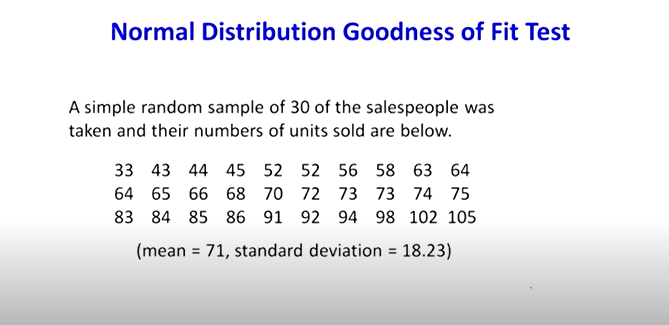

In [68]:
data=[33,43,44,45,52,52,56,58,63,64,64,65,66,68,70,72,73,73,74,75,83,84,85,86,91,92,94,98,102,105]

In [70]:
mean=np.mean(data)
std=round(np.std(data),2)
print(mean)
print(std)

71.0
18.23


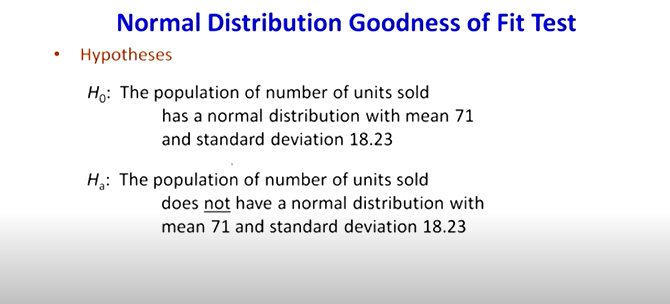

In [72]:
prob_intervals=[]
for j in range(1,6):
    prob_intervals.append(round((stats.norm.ppf(j*(1/6),mean,std)),2))
    
prob_intervals

[53.36, 63.15, 71.0, 78.85, 88.64]

In [78]:
dictionary={'Less than 53.36':0,'Between 53.36 and 63.14':0,'Between 63.15 and 70.99':0,'Between 71.0 and 78.84':0,'Between 78.85 and 88.63':0,
           'More than 88.64':0}

for i in data:
    if i<= 53.36:
        dictionary['Less than 53.36']+=1
    if i>53.36 and i<=63.14:
        dictionary['Between 53.36 and 63.14']+=1
    if i>63.14 and i<=70.99:
        dictionary['Between 63.15 and 70.99']+=1
    if i>70.99 and i<=78.84:
        dictionary['Between 71.0 and 78.84']+=1
    if i>78.85 and i<=88.63:
        dictionary['Between 78.85 and 88.63']+=1
    if i>88.64:
        dictionary['More than 88.64']+=1
       
    
dictionary
        

{'Less than 53.36': 6,
 'Between 53.36 and 63.14': 3,
 'Between 63.15 and 70.99': 6,
 'Between 71.0 and 78.84': 5,
 'Between 78.85 and 88.63': 4,
 'More than 88.64': 6}

In [81]:
observedFrequency=[value for value in dictionary.values()]
observedFrequency

[6, 3, 6, 5, 4, 6]

In [83]:
mean2=np.mean(observedFrequency)
mean2

5.0

In [84]:
expectedFrequency=[5 for i in range(len(observedFrequency))]
expectedFrequency

[5, 5, 5, 5, 5, 5]

In [91]:
chi2Calculated, _=stats.chisquare(observedFrequency,expectedFrequency)
chi2Calculated

1.5999999999999999

In [96]:
chi2Tabular=stats.chi2.ppf(0.95,3)

In [97]:
chi2Tabular

7.814727903251179

In [99]:
# Since chiCalculated is less than chi2Tabular we accept the null hypothesis ie the data 
#has normal distribution with mean 71 and std 18,23